<a href="https://colab.research.google.com/github/UrielMendoza/Curso-RV-python/blob/master/Martes_resuelto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### GDAL
La Open Source Geospatial Foundation, es una organización no gubernamental cuya misión es dar soporte y promover el desarrollo colaborativo de tecnologías geoespaciales y datos abiertos

GDAL,Geonetwork,Geoserver,Proj,GEOS,PostGIS,OpenLayers,Leaflet,QGIS,GvSIG,Grass

GDAL,Geospatial Data Abstraction Library o GDAL es una biblioteca de software para la lectura y escritura de formatos de datos geoespaciales, publicada bajo la MIT License por la fundación geoespacial de código abierto.

Importación 

In [0]:
from osgeo import gdal

Apertura

In [0]:
ds = gdal.Open('/content/drive/My Drive/Curso-RV-python/Morelos_r15m.tif')

In [0]:
type(ds)

osgeo.gdal.Dataset

Metadato

In [0]:
print(gdal.Info(ds))

Driver: GTiff/GeoTIFF
Files: /content/drive/My Drive/Curso-RV-python/Morelos_r15m.tif
Size is 6203, 5755
Coordinate System is:
GEOGCS["GCS_ITRF_1992",
    DATUM["ITRF_1992",
        SPHEROID["GRS_1980",6378137,298.257222101]],
    PRIMEM["Greenwich",0],
    UNIT["degree",0.0174532925199433]]
Origin = (-99.494414147794700,19.131678633950401)
Pixel Size = (0.000138888889000,-0.000138888889000)
Metadata:
  AREA_OR_POINT=Area
Image Structure Metadata:
  INTERLEAVE=BAND
Corner Coordinates:
Upper Left  ( -99.4944141,  19.1316786) ( 99d29'39.89"W, 19d 7'54.04"N)
Lower Left  ( -99.4944141,  18.3323731) ( 99d29'39.89"W, 18d19'56.54"N)
Upper Right ( -98.6328864,  19.1316786) ( 98d37'58.39"W, 19d 7'54.04"N)
Lower Right ( -98.6328864,  18.3323731) ( 98d37'58.39"W, 18d19'56.54"N)
Center      ( -99.0636503,  18.7320259) ( 99d 3'49.14"W, 18d43'55.29"N)
Band 1 Block=6203x1 Type=Int16, ColorInterp=Gray
  NoData Value=32767
  Metadata:
    STATISTICS_COVARIANCES=267332.7996236944
    STATISTICS_SKIPFACT

In [0]:
ds.GetMetadata()
ds.GetDescription()

'/content/drive/My Drive/Curso-RV-python/Morelos_r15m.tif'

Sistema de referencia y proyección

In [0]:
ds.GetProjection()
ds.GetProjectionRef()
ds.GetGCPProjection()

'GEOGCS["GCS_ITRF_1992",DATUM["ITRF_1992",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]]'

GeoTrasformación

**(xmin, w-e pixel res, rot x, ymax, rot y, n-s pixel res(-))**

In [0]:
ds.GetGeoTransform()

(-99.4944141477947,
 0.000138888889000001,
 0.0,
 19.1316786339504,
 0.0,
 -0.000138888889000001)

Caracteristicas Datos

In [0]:
ds.RasterXSize
ds.RasterYSize

5755

Bandas

In [0]:
banda = ds.GetRasterBand(1) 
type(banda)

osgeo.gdal.Band

Datos númericos

In [0]:
data = banda.ReadAsArray()
data

array([[32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       ...,
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767]], dtype=int16)

In [0]:
type(data)

numpy.ndarray

In [0]:
data.shape

(5755, 6203)

**Graficación**

Matplotlib

Matplotlib es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy.

Importación

In [0]:
import matplotlib.pyplot as plt

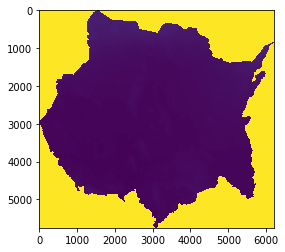

In [0]:
plt.imshow(data)

### Rasterio

Rasterio emplea GDAL de formato ráster. Sus funciones generalmente aceptan y devuelven numpy ndarrays. Rasterio está diseñado para que trabajar con datos ráster geoespaciales sea más productivo y divertido.

Instalación

In [142]:
!pip install rasterio

     |████████████████████████████████| 18.0MB 238kB/s 


Importación

In [0]:
import rasterio

Apertura

In [0]:
ds2 = rasterio.open('/content/drive/My Drive/Curso-RV-python/Morelos_r15m.tif')

Metadato

In [0]:
ds2.read_crs()
ds2.width
ds2.bounds
ds2.get_transform()

[-99.4944141477947,
 0.000138888889000001,
 0.0,
 19.1316786339504,
 0.0,
 -0.000138888889000001]

Datos númericos

In [0]:
data2 = ds2.read(1)
type(data2)
data2


array([[32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       ...,
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767],
       [32767, 32767, 32767, ..., 32767, 32767, 32767]], dtype=int16)

In [0]:
data2[2000:2500,2000:2500]

array([[1292, 1293, 1293, ..., 1622, 1633, 1644],
       [1291, 1292, 1292, ..., 1621, 1632, 1643],
       [1290, 1291, 1291, ..., 1620, 1631, 1642],
       ...,
       [1123, 1124, 1124, ..., 1539, 1536, 1532],
       [1123, 1124, 1124, ..., 1534, 1530, 1526],
       [1123, 1124, 1124, ..., 1530, 1525, 1520]], dtype=int16)

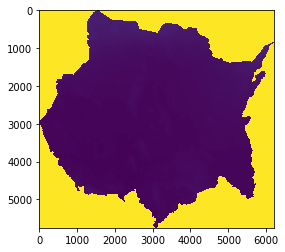

In [0]:
plt.imshow(data2)

No Data

In [0]:
import numpy as np
np.nan

nan

In [0]:
data2 = np.where(data2 == 32767,np.nan,data2)
data2

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

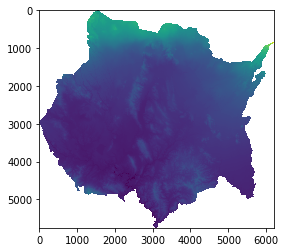

In [0]:
plt.imshow(data2)

Contour (Curvas de nivel)

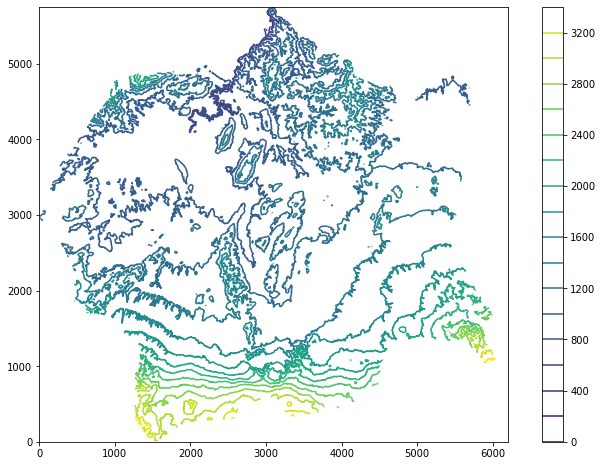

In [0]:
plt.figure(figsize = (12, 8))
plt.contour(data2,levels = list(range(0, 3500, 200)))
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

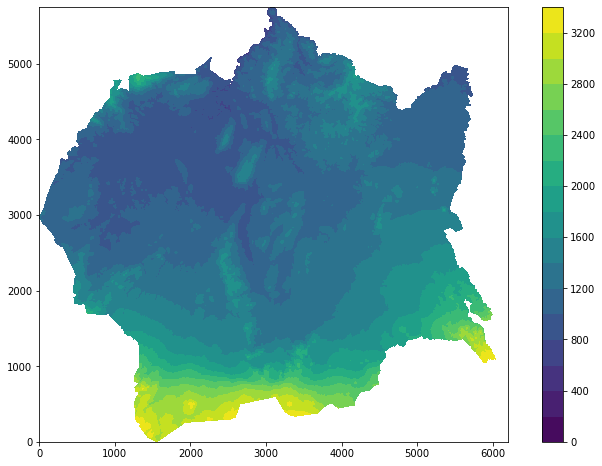

In [0]:
plt.figure(figsize = (12, 8))
plt.contourf(data2,levels = list(range(0, 3500, 200)))
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

Histograma

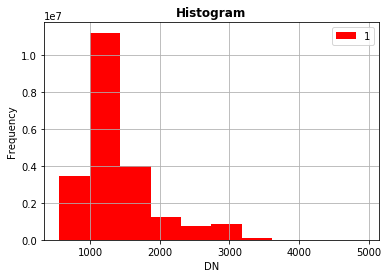

In [0]:
from rasterio.plot import show_hist
show_hist(ds2)

### **Ejercicio de aplicación**

1. Graficar de los valores (2000:2500 en X y 500:1000 en Y) y obtener curvas de nivel
2. Dar coordenadas extremas y obtener curvas de nivel
3. Dar coordenadas y obtener elevación

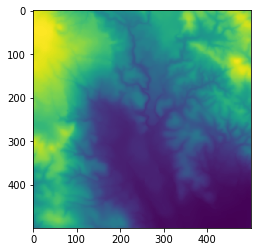

In [0]:
plt.imshow(data[2000:2500,500:1000])

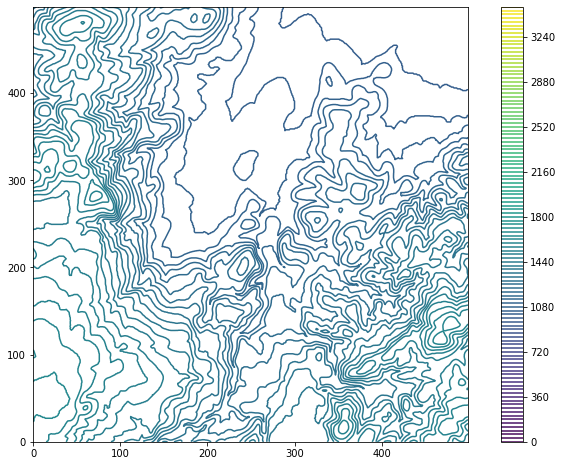

In [0]:
plt.figure(figsize = (12, 8))
plt.contour(data[2000:2500,500:1000],levels = list(range(0, 3500, 30)))
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

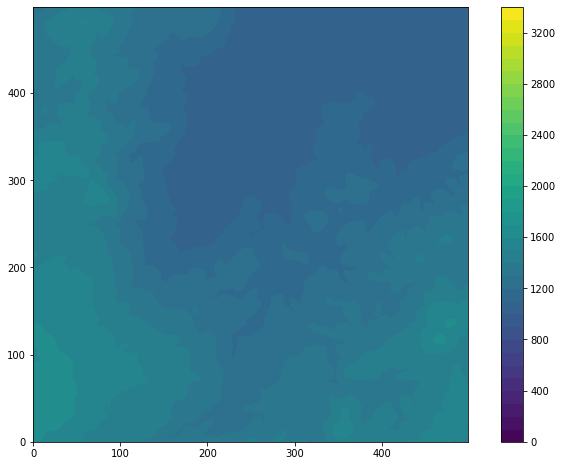

In [0]:
plt.figure(figsize = (12, 8))
plt.contourf(data[2000:2500,500:1000],levels = list(range(0, 3500, 100)))
plt.colorbar()
plt.gca().set_aspect('equal', adjustable='box')

In [0]:
geoTra = ds.GetGeoTransform()
geoTra
resx = geoTra[1]
resy = geoTra[5]
xmin = geoTra[0]
xmax = geoTra[0] + resx*data.shape[1]
ymax = geoTra[3]
ymin = ymax + resy*data.shape[0]
xmin,xmax,ymin,ymax

(-99.4944141477947, -98.6328863693277, 18.332373077755395, 19.1316786339504)

F = (x - xmin)/rex

C = (y - ymin)/resy

In [0]:
(-99.2-xmin)/resx


2119.7818624259785

In [0]:
xminU = int((float(input('Xmin:'))-xmin)/resx)
xmaxU = int((float(input('Xmax:'))-xmin)/resx)
yminU = int(abs((float(input('Ymin:'))-ymin)/resy))
ymaxU = int(abs((float(input('Ymax:'))-ymin)/resy))

Xmin:-99.2
Xmax:-98.9
Ymin:18.5
Ymax:18.9


In [0]:
xminU,xmaxU,yminU,ymaxU

(2119, 4279, 1206, 4086)

Elevacion Xmin,Ymin: 1286
Elevacion Xmax,Ymax: 1350


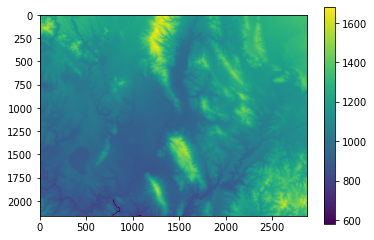

In [0]:
plt.imshow(data[xminU:xmaxU,yminU:ymaxU])
plt.colorbar()
print('Elevacion Xmin,Ymin:', data[xminU,yminU])
print('Elevacion Xmax,Ymax:', data[xmaxU,ymaxU])

Xmin:-99.3
Xmax:-98.7
Ymin:18.5
Ymax:19.1
Elevacion Xmin,Ymin: 32767
Elevacion Xmax,Ymax: 32767


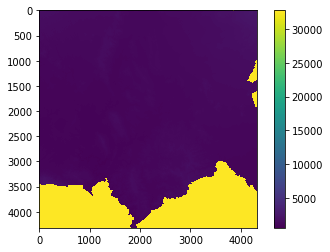

In [0]:
xminU = int((float(input('Xmin:'))-xmin)/resx)
xmaxU = int((float(input('Xmax:'))-xmin)/resx)
yminU = int(abs((float(input('Ymin:'))-ymin)/resy))
ymaxU = int(abs((float(input('Ymax:'))-ymin)/resy))
plt.imshow(data[xminU:xmaxU,yminU:ymaxU])
plt.colorbar()
print('Elevacion Xmin,Ymin:', data[xminU,yminU])
print('Elevacion Xmax,Ymax:', data[xmaxU,ymaxU])

### **Operaciones de datos Raster**

Apertura de bandas

In [0]:
import rasterio
b3 = gdal.Open('/content/drive/My Drive/Curso-RV-python/T14QMF_20181223T170719_B03_10m_geo_rec.tif')
b8 = gdal.Open('/content/drive/My Drive/Curso-RV-python/T14QMF_20181223T170719_B08_10m_geo_rec.tif')

In [212]:
b3
b8

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f0008390480> >

Extracción de datos

In [213]:
dataB3 = b3.ReadAsArray()
dataB8 = b8.ReadAsArray()
dataB3.shape,dataB8.shape

((5292, 5400), (5292, 5400))

Calculo de indice NDWI
A través del cálculo del índice NDWI (Índice Diferencial de Agua Normalizado) podemos identificar masas de agua y zonas de elevada saturación de humedad por medio del análisis de imágenes satélite. De esta forma podemos emplear el índice como unidad de medida para determinar el estrés hídrico en vegetación, saturación de humedad en suelo o realizar delimitaciones directas de masas de agua como lagos y embalses.

Sentinel-2 
NDWI = (B3-B8)/(B3+B8)


In [214]:
import numpy as np
#np.seterr(divide='ignore', invalid='ignore')
ndwi = (dataB3 - dataB8)/(dataB3 + dataB8)
np.nanmax(ndwi)

65535.0

Eliminación de nodata

In [0]:
ndwi = np.where(ndwi == 65535.0, np.nan,ndwi)

Graficación de indice

546.0333333333333

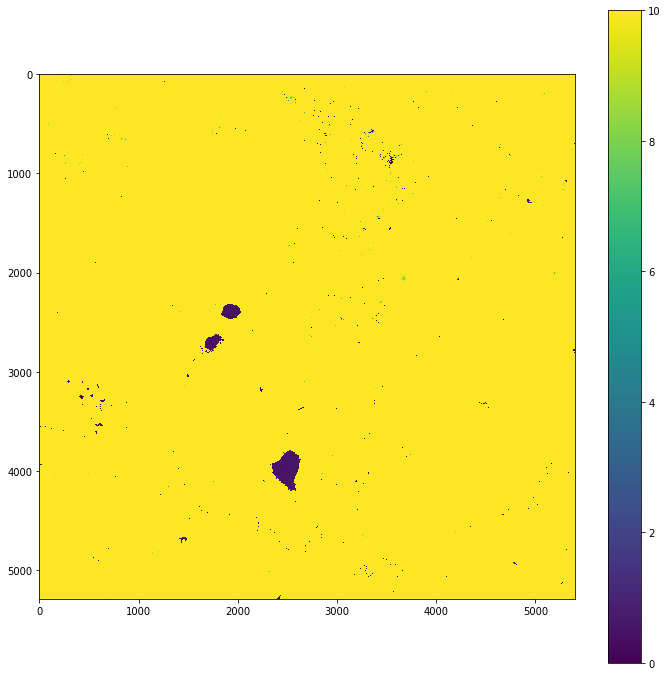

In [216]:
plt.figure(figsize=(12,12))
plt.imshow(ndwi,vmin=0,vmax=10)
plt.colorbar()
import numpy as np
np.nanmax(ndwi)
#np.nanmin(ndwi)

### **Depuración datos raster**

Emascaramiento np.where

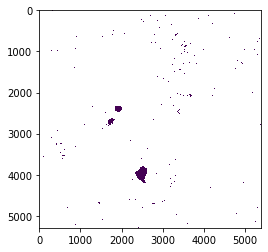

In [217]:
ndwi = np.where(ndwi > 10 , np.nan,1)
plt.imshow(ndwi)

### **Georreferencia y reproyección de datos Raster**

Creacion de archivo
```
dst_ds = gdal.GetDriverByName('GTiff').Create('tmp.tif', ny, nx, 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform(geotransform)    # Aplica la geotransformacion y la proyección
srs = osr.SpatialReference()            # Establece el ensamble
srs.ImportFromProj4("+proj=utm +zone=14 +ellps=WGS84 +datum=WGS84 +units=m +no_defs ") # Proyeccion UTM 14 N
dst_ds.SetProjection(srs.ExportToWkt()) # Exporta el sistema de coordenadas
dst_ds.GetRasterBand(1).WriteArray(data)   # Escribe la banda al raster
dst_ds.FlushCache()                     # Escribe en el disco

dst_ds = None
```






In [0]:
from osgeo import osr

In [0]:
dst_ds = gdal.GetDriverByName('GTiff').Create('ndwi.tif', ndwi.shape[1],  ndwi.shape[0], 1, gdal.GDT_Float32)
dst_ds.SetGeoTransform(b2.GetGeoTransform())    # Aplica la geotransformacion y la proyección
srs = osr.SpatialReference()            # Establece el ensamble
srs.ImportFromProj4("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs") # Proyeccion EPSG:4326
dst_ds.SetProjection(srs.ExportToWkt()) # Exporta el sistema de coordenadas
dst_ds.GetRasterBand(1).WriteArray(ndwi)   # Escribe la banda al raster
dst_ds.FlushCache()                     # Escribe en el disco

dst_ds = None

**Reproyección gdalwarp**

In [219]:
ds = gdal.Open('ndwi.tif')
gdal.Warp('ndwi_UTM.tif',ds,options=gdal.WarpOptions(dstSRS='EPSG:32614'))

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f0007ff9f90> >

**Compuestos datos raster**

np.dstack

## Ejercicio de aplicación.

1. Abrir bandas , recortarlas con coordenadas del usuario
2. Calcular NDWI
3. Depurar datos
4. Enmascarar valores 
5. Escribir archivo
6. Reproyectar a UTM